In [57]:
##VERY IMPORTANT OR PLOTS FROM MATPLOT WILL NOT SHOW! IT TOOK AN HOUR FOR ME TO FIGURE THIS OUT!##
%matplotlib inline 
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config IPCompleter.greedy=True #Turn on AutoComplete
sns.set_style('whitegrid')

#######Temp
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier
###EndTemp

In [58]:
kobe_df = pd.read_excel("Data_Wrangling_Project_2.xlsx","Project Wrangling")
#kobe_df = pd.read_csv("Data_Wrangling_Project_2.csv")
#kobe_df = pd.read_csv("data.csv")

#kobe_df.set_index('shot_id', inplace=True)
#kobe_df["action_type"] = kobe_df["action_type"].astype('object')
#kobe_df["combined_shot_type"] = kobe_df["combined_shot_type"].astype('category')
#kobe_df["game_event_id"] = kobe_df["game_event_id"].astype('category')
#kobe_df["game_id"] = kobe_df["game_id"].astype('category')
#kobe_df["period"] = kobe_df["period"].astype('object')
#kobe_df["playoffs"] = kobe_df["playoffs"].astype('category')
#kobe_df["season"] = kobe_df["season"].astype('category')
#kobe_df["shot_made_flag"] = kobe_df["shot_made_flag"].astype('category')
#kobe_df["shot_type"] = kobe_df["shot_type"].astype('category')
#kobe_df["team_id"] = kobe_df["team_id"].astype('category')

pd.set_option('display.max_columns', None) #Displays All the columns
print("Dataset has {} entries and {} features".format(*kobe_df.shape))

# preview data
kobe_df.head()

Dataset has 25697 entries and 31 features


,recId,action_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,shot_type,team_id,team_name,game_date,opponent,shot_id,attendance,arena_temp,avgnoisedb,Season_2,action_type_2,matchup_2,Comb_shot_type,shot_zo_basic,shot_zo_range,shot_zone_area_2,shot_dist_Outlier_detection
0,1401,Alley Oop Dunk Shot,120,20000965,34.0443,0,0,-118.2698,8,2,0,39,0,0,2PT Field Goal,1610612747,Los Angeles Lakers,2001-03-19,ATL,1402,16253,69,95.73,5,1,1,4,5,4,2,1
1,1408,Alley Oop Layup shot,287,20000965,34.0443,0,0,-118.2698,6,3,0,56,0,1,2PT Field Goal,1610612747,Los Angeles Lakers,2001-03-19,ATL,1410,16253,69,95.73,5,2,1,5,5,4,2,1
2,4756,Driving Dunk Shot,68,20201017,34.0443,0,0,-118.2698,4,1,0,33,0,1,2PT Field Goal,1610612747,Los Angeles Lakers,2003-03-25,ATL,4756,13449,72,92.11,7,5,1,4,5,4,2,1
3,14696,Driving Dunk Shot,43,20801092,34.0443,0,0,-118.2698,8,1,0,57,0,1,2PT Field Goal,1610612747,Los Angeles Lakers,2009-03-29,ATL,14696,14206,72,94.08,13,5,1,4,5,4,2,1
4,22061,Driving Floating Jump Shot,26,21500286,33.9693,73,75,-118.1968,8,1,0,44,10,0,2PT Field Goal,1610612747,Los Angeles Lakers,2015-12-04,ATL,22061,14056,69,94.60,20,9,1,1,1,3,6,1


In [59]:
kobe_df.groupby('shot_made_flag').size()

shot_made_flag
0    14232
1    11465
dtype: int64

In [60]:
pandas_profiling.ProfileReport(kobe_df)

Number of variables,31
Number of observations,25697
Total Missing (%),0.0%
Total size in memory,6.1 MiB
Average record size in memory,248.0 B
Numeric,19
Categorical,3
Boolean,2
Date,1
Text (Unique),0
Rejected,6


In [5]:
profile = pandas_profiling.ProfileReport(kobe_df)
profile.to_file(outputfile="data_analysis.html")

You can see a HTML version of the data located [here](data_analysis.html).

In [6]:
# check how many missing values each feature contains
kobe_df.isnull().sum(axis = 0)

recId                          0
action_type                    0
game_event_id                  0
game_id                        0
lat                            0
loc_x                          0
loc_y                          0
lon                            0
minutes_remaining              0
period                         0
playoffs                       0
seconds_remaining              0
shot_distance                  0
shot_made_flag                 0
shot_type                      0
team_id                        0
team_name                      0
game_date                      0
opponent                       0
shot_id                        0
attendance                     0
arena_temp                     0
avgnoisedb                     0
Season_2                       0
action_type_2                  0
matchup_2                      0
Comb_shot_type                 0
shot_zo_basic                  0
shot_zo_range                  0
shot_zone_area_2               0
shot_dist_

## Detect and remove outliers

In [293]:
def detect_outliers(series, whis=1.5):
    q75, q25 = np.percentile(series, [75 ,25])
    iqr = q75 - q25
    return ~((series - series.median()).abs() <= (whis * iqr))

## For now - do not remove anything

In [295]:
pd.set_option('display.max_columns', None) #Displays All the columns
print("Dataset has {} entries and {} features".format(*kobe_df.shape))

# preview data
kobe_df.head()

Dataset has 25697 entries and 31 features


,recId,action_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,shot_type,team_id,team_name,game_date,opponent,shot_id,attendance,arena_temp,avgnoisedb,Season_2,action_type_2,matchup_2,Comb_shot_type,shot_zo_basic,shot_zo_range,shot_zone_area_2,shot_dist_Outlier_detection
0,1401,Alley Oop Dunk Shot,120,20000965,34.0443,0,0,-118.2698,8,2,0,39,0,0,2PT Field Goal,1610612747,Los Angeles Lakers,2001-03-19,ATL,1402,16253,69,95.73,5,1,1,4,5,4,2,1
1,1408,Alley Oop Layup shot,287,20000965,34.0443,0,0,-118.2698,6,3,0,56,0,1,2PT Field Goal,1610612747,Los Angeles Lakers,2001-03-19,ATL,1410,16253,69,95.73,5,2,1,5,5,4,2,1
2,4756,Driving Dunk Shot,68,20201017,34.0443,0,0,-118.2698,4,1,0,33,0,1,2PT Field Goal,1610612747,Los Angeles Lakers,2003-03-25,ATL,4756,13449,72,92.11,7,5,1,4,5,4,2,1
3,14696,Driving Dunk Shot,43,20801092,34.0443,0,0,-118.2698,8,1,0,57,0,1,2PT Field Goal,1610612747,Los Angeles Lakers,2009-03-29,ATL,14696,14206,72,94.08,13,5,1,4,5,4,2,1
4,22061,Driving Floating Jump Shot,26,21500286,33.9693,73,75,-118.1968,8,1,0,44,10,0,2PT Field Goal,1610612747,Los Angeles Lakers,2015-12-04,ATL,22061,14056,69,94.60,20,9,1,1,1,3,6,1


In [296]:
kobe_df.describe(include=['number'])

,recId,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id,attendance,arena_temp,avgnoisedb,Season_2,action_type_2,matchup_2,Comb_shot_type,shot_zo_basic,shot_zo_range,shot_zone_area_2,shot_dist_Outlier_detection
count,25697.000000,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000
mean,15326.181188,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946,15040.683621,70.107717,94.951369,10.431879,26.827918,37.703545,1.872865,3.723703,2.568276,3.437327,0.925127
std,8860.246845,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397,1076.226662,2.030165,2.281707,4.855144,9.397384,21.089624,1.613128,1.648170,1.187976,1.533780,0.263191
min,1.000000,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000,11065.000000,64.000000,88.560000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,7646.000000,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000,14314.000000,69.000000,93.400000,6.000000,26.000000,18.000000,1.000000,3.000000,1.000000,2.000000,1.000000
50%,15333.000000,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000,15048.000000,70.000000,94.920000,11.000000,26.000000,36.000000,1.000000,3.000000,3.000000,3.000000,1.000000
75%,22973.000000,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000,15738.000000,71.000000,96.490000,14.000000,26.000000,55.000000,1.000000,5.000000,4.000000,5.000000,1.000000
max,30692.000000,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000,20845.000000,79.000000,102.430000,20.000000,55.000000,74.000000,6.000000,7.000000,5.000000,6.000000,1.000000


In [80]:
#kobe_df.dtypes

# Data Visualization
See target class distribution

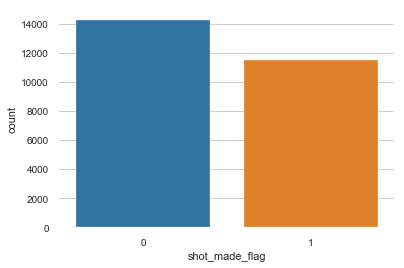

In [145]:
import seaborn as sns
%matplotlib inline
#sns.set(style="darkgrid")
#ax = plt.axes()
#sns.countplot(x='shot_made_flag', data=kobe_df, ax=ax);
#ax.set_title('Target class distribution')
#plt.show()

#kobe_df= sns.load_dataset("kobe_df")
ax = sns.countplot(x="shot_made_flag", data=kobe_df)
plt.show()

In [14]:
#f, axarr = plt.subplots(5, 2, figsize=(15, 15))
#
#sns.boxplot(x='lat', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[0,0])
#sns.boxplot(x='attendance', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[0, 1])
#sns.boxplot(x='loc_y', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[1, 0])
#sns.boxplot(x='loc_x', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[1, 1])
#sns.boxplot(x='minutes_remaining', y='shot_made_flag', showmeans=True, data=kobe_df, ax=axarr[2, 0])
#sns.boxplot(x='seconds_remaining', y='shot_made_flag', showmeans=True, data=kobe_df, ax=axarr[2, 1])
#sns.boxplot(x='shot_distance', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[3, 0])
#sns.boxplot(x='arena_temp', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[3, 1])
#sns.boxplot(x='avgnoisedb', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[4, 0])
#
#axarr[0, 0].set_title('Latitude')
#axarr[0, 1].set_title('attendance')
#axarr[1, 0].set_title('Loc y')
#axarr[1, 1].set_title('Loc x')
#axarr[2, 0].set_title('Minutes remaining')
#axarr[2, 1].set_title('Seconds remaining')
#axarr[3, 0].set_title('Shot distance')
#axarr[3, 1].set_title('Arena Temp')
#axarr[4, 0].set_title('Average DB')
#
#plt.tight_layout()
#plt.show()

In [15]:
#f, axarr = plt.subplots(8, figsize=(15, 25))
#
#sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=kobe_df, ax=axarr[0])
#sns.countplot(x="season", hue="shot_made_flag", data=kobe_df, ax=axarr[1])
#sns.countplot(x="period", hue="shot_made_flag", data=kobe_df, ax=axarr[2])
#sns.countplot(x="playoffs", hue="shot_made_flag", data=kobe_df, ax=axarr[3])
#sns.countplot(x="shot_type", hue="shot_made_flag", data=kobe_df, ax=axarr[4])
#sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=kobe_df, ax=axarr[5])
#sns.countplot(x="shot_zone_basic", hue="shot_made_flag", data=kobe_df, ax=axarr[6])
#sns.countplot(x="shot_zone_range", hue="shot_made_flag", data=kobe_df, ax=axarr[7])
#
#axarr[0].set_title('Combined shot type')
#axarr[1].set_title('Season')
#axarr[2].set_title('Period')
#axarr[3].set_title('Playoffs')
#axarr[4].set_title('Shot Type')
#axarr[5].set_title('Shot Zone Area')
#axarr[6].set_title('Shot Zone Basic')
#axarr[7].set_title('Shot Zone Range')
#
#plt.tight_layout()
#plt.show()

In [16]:
# Computing IQR
#Q1 = kobe_df['shot_distance'].quantile(0.25)
#Q3 = kobe_df['shot_distance'].quantile(0.75)
#IQR = Q3 - Q1
#IQR = Q3
#IQR
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
#filtered = kobe_df.query('(@Q1 - 1.5 * @IQR) <= shot_distance <= (@Q3 + 1.5 * @IQR)')
#filtered = kobe_df.query('shot_made_flag <= (@Q3 + 1.5 * @IQR)')
#filtered.describe(include=['number'])

In [413]:
#kobe_df.join(filtered, rsuffix='_filtered').boxplot()

In [17]:
#kobe_df = kobe_df[(kobe_df['shot_distance'] < 23)]
#kobe_df.loc[kobe_df['shot_distance'] == 24,'shot_made_flag'] = 0

In [297]:
kobe_df.describe(include=['number'])

,recId,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id,attendance,arena_temp,avgnoisedb,Season_2,action_type_2,matchup_2,Comb_shot_type,shot_zo_basic,shot_zo_range,shot_zone_area_2,shot_dist_Outlier_detection
count,25697.000000,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000
mean,15326.181188,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946,15040.683621,70.107717,94.951369,10.431879,26.827918,37.703545,1.872865,3.723703,2.568276,3.437327,0.925127
std,8860.246845,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397,1076.226662,2.030165,2.281707,4.855144,9.397384,21.089624,1.613128,1.648170,1.187976,1.533780,0.263191
min,1.000000,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000,11065.000000,64.000000,88.560000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,7646.000000,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000,14314.000000,69.000000,93.400000,6.000000,26.000000,18.000000,1.000000,3.000000,1.000000,2.000000,1.000000
50%,15333.000000,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000,15048.000000,70.000000,94.920000,11.000000,26.000000,36.000000,1.000000,3.000000,3.000000,3.000000,1.000000
75%,22973.000000,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000,15738.000000,71.000000,96.490000,14.000000,26.000000,55.000000,1.000000,5.000000,4.000000,5.000000,1.000000
max,30692.000000,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000,20845.000000,79.000000,102.430000,20.000000,55.000000,74.000000,6.000000,7.000000,5.000000,6.000000,1.000000


# 3. Prepare Data

## Data Cleaning
We are assuming an independence of each shot - therefore some columns might be dropped

In [61]:
#target = kobe_df['shot_made_flag']

# Remove some columns
#kobe_df.drop('team_id', axis=1, inplace=True) # Always one number
#data_cl.drop('lat', axis=1, inplace=True) # Correlated with loc_x
#kobe_df.drop('lon', axis=1, inplace=True) # Correlated with loc_x
#kobe_df.drop('period', axis=1, inplace=True) # Highly Correlated with game_event_id
#kobe_df.drop('playoffs', axis=1, inplace=True) # Highly Correlated with game_id
kobe_df.drop('team_name', axis=1, inplace=True) # Always LA Lakers
#kobe_df.drop('recId', axis=1, inplace=True) # Highly Correlated with shot_Id
kobe_df.drop('loc_x', axis=1, inplace=True)#Contain negative numbers, doesn't work with RFE(LogisticRegression()
kobe_df.drop('loc_y', axis=1, inplace=True)#Contain negative numbers, doesn't work with RFE(LogisticRegression()
kobe_df.drop('action_type', axis=1, inplace=True)
kobe_df.drop('lon', axis=1, inplace=True)#Contain negative numbers, doesn't work with RFE(LogisticRegression()

In [62]:
#kobe_df.dtypes

# Data Transformation
New features

In [63]:
# Remaining time
#kobe_df['seconds_from_period_end'] = 60 * kobe_df['minutes_remaining'] + kobe_df['seconds_remaining']
#kobe_df['last_5_sec_in_period'] = kobe_df['seconds_from_period_end'] < 5

kobe_df.drop('minutes_remaining', axis=1, inplace=True)
kobe_df.drop('opponent', axis=1, inplace=True)
#kobe_df.drop('seconds_remaining', axis=1, inplace=True)
#kobe_df.drop('seconds_from_period_end', axis=1, inplace=True)

## Matchup - (away/home)
#kobe_df['home_play'] = kobe_df['matchup'].str.contains('vs').astype('int')
#kobe_df.drop('matchup', axis=1, inplace=True)

# Game date
kobe_df['game_date'] = pd.to_datetime(kobe_df['game_date'])
kobe_df['game_year'] = kobe_df['game_date'].dt.year
kobe_df['game_month'] = kobe_df['game_date'].dt.month
kobe_df.drop('game_date', axis=1, inplace=True)

# Loc_x, and loc_y binning
#kobe_df['loc_x'] = pd.cut(kobe_df['loc_x'], 25)
#kobe_df['loc_y'] = pd.cut(kobe_df['loc_y'], 25)

# Replace 20 least common action types with value 'Other'
#rare_action_types = kobe_df['action_type'].value_counts().sort_values().index.values[:20]
#kobe_df.loc[kobe_df['action_type'].isin(rare_action_types), 'action_type'] = 'Other'

## Encode categorical variables

In [64]:
#categorial_cols = [
#    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
#    #'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_month', 'opponent', 'loc_x', 'loc_y']
#    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_month', 'opponent']
#
#for cc in categorial_cols:
#    dummies = pd.get_dummies(kobe_df[cc])
#    dummies = dummies.add_prefix("{}#".format(cc))
#    kobe_df.drop(cc, axis=1, inplace=True)
#    kobe_df = kobe_df.join(dummies)

In [65]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
categorial_cols = ['shot_type']
    
for cc in categorial_cols:
    kobe_df[cc+"_code"] = lb_make.fit_transform(kobe_df[cc])
    #dummies = pd.get_dummies(kobe_df[cc])
    #dummies = dummies.add_prefix("{}#".format(cc))
    kobe_df.drop(cc, axis=1, inplace=True)
    #kobe_df = kobe_df.join(dummies)
    
kobe_df.head()    

,recId,game_event_id,game_id,lat,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id,attendance,arena_temp,avgnoisedb,Season_2,action_type_2,matchup_2,Comb_shot_type,shot_zo_basic,shot_zo_range,shot_zone_area_2,shot_dist_Outlier_detection,game_year,game_month,shot_type_code
0,1401,120,20000965,34.0443,2,0,39,0,0,1610612747,1402,16253,69,95.73,5,1,1,4,5,4,2,1,2001,3,0
1,1408,287,20000965,34.0443,3,0,56,0,1,1610612747,1410,16253,69,95.73,5,2,1,5,5,4,2,1,2001,3,0
2,4756,68,20201017,34.0443,1,0,33,0,1,1610612747,4756,13449,72,92.11,7,5,1,4,5,4,2,1,2003,3,0
3,14696,43,20801092,34.0443,1,0,57,0,1,1610612747,14696,14206,72,94.08,13,5,1,4,5,4,2,1,2009,3,0
4,22061,26,21500286,33.9693,1,0,44,10,0,1610612747,22061,14056,69,94.60,20,9,1,1,1,3,6,1,2015,12,0


## Remove null Values or NANs

In [66]:
kobe_df[kobe_df.isnull().any(axis=1)]

,recId,game_event_id,game_id,lat,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id,attendance,arena_temp,avgnoisedb,Season_2,action_type_2,matchup_2,Comb_shot_type,shot_zo_basic,shot_zo_range,shot_zone_area_2,shot_dist_Outlier_detection,game_year,game_month,shot_type_code


In [304]:
kobe_df.head()

,recId,game_event_id,game_id,lat,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id,attendance,arena_temp,avgnoisedb,Season_2,action_type_2,matchup_2,Comb_shot_type,shot_zo_basic,shot_zo_range,shot_zone_area_2,shot_dist_Outlier_detection,game_year,game_month,shot_type_code
0,1401,120,20000965,34.0443,2,0,39,0,0,1610612747,1402,16253,69,95.73,5,1,1,4,5,4,2,1,2001,3,0
1,1408,287,20000965,34.0443,3,0,56,0,1,1610612747,1410,16253,69,95.73,5,2,1,5,5,4,2,1,2001,3,0
2,4756,68,20201017,34.0443,1,0,33,0,1,1610612747,4756,13449,72,92.11,7,5,1,4,5,4,2,1,2003,3,0
3,14696,43,20801092,34.0443,1,0,57,0,1,1610612747,14696,14206,72,94.08,13,5,1,4,5,4,2,1,2009,3,0
4,22061,26,21500286,33.9693,1,0,44,10,0,1610612747,22061,14056,69,94.60,20,9,1,1,1,3,6,1,2015,12,0


## Save File to Excel

In [422]:
#writing to excel
#writer = pd.ExcelWriter('kobe_data_wrangled.xlsx', engine='xlsxwriter')
#kobe_df.to_excel(writer, sheet_name='Sheet1')
#writer.save()

# Feature Selection
Let's reduce the number of features

Create views for easier analysi

In [67]:
y = kobe_df.shot_made_flag.values
kobe_df.drop(["shot_made_flag"], axis=1, inplace=True)
X = kobe_df

In [68]:
#X.drop(["opponent"], axis=1, inplace=True)
X.head()

,recId,game_event_id,game_id,lat,period,playoffs,seconds_remaining,shot_distance,team_id,shot_id,attendance,arena_temp,avgnoisedb,Season_2,action_type_2,matchup_2,Comb_shot_type,shot_zo_basic,shot_zo_range,shot_zone_area_2,shot_dist_Outlier_detection,game_year,game_month,shot_type_code
0,1401,120,20000965,34.0443,2,0,39,0,1610612747,1402,16253,69,95.73,5,1,1,4,5,4,2,1,2001,3,0
1,1408,287,20000965,34.0443,3,0,56,0,1610612747,1410,16253,69,95.73,5,2,1,5,5,4,2,1,2001,3,0
2,4756,68,20201017,34.0443,1,0,33,0,1610612747,4756,13449,72,92.11,7,5,1,4,5,4,2,1,2003,3,0
3,14696,43,20801092,34.0443,1,0,57,0,1610612747,14696,14206,72,94.08,13,5,1,4,5,4,2,1,2009,3,0
4,22061,26,21500286,33.9693,1,0,44,10,1610612747,22061,14056,69,94.60,20,9,1,1,1,3,6,1,2015,12,0


# Variance Threshold
Find all features with more than 90% variance in values.

In [69]:
threshold = 0.90
vt = VarianceThreshold().fit(X)

# Find feature names
feat_var_threshold = kobe_df.columns[vt.variances_ > threshold * (1-threshold)]
feat_var_threshold

Index(['recId', 'game_event_id', 'game_id', 'period', 'playoffs',
       'seconds_remaining', 'shot_distance', 'shot_id', 'attendance',
       'arena_temp', 'avgnoisedb', 'Season_2', 'action_type_2', 'matchup_2',
       'Comb_shot_type', 'shot_zo_basic', 'shot_zo_range', 'shot_zone_area_2',
       'game_year', 'game_month', 'shot_type_code'],
      dtype='object')

In [70]:
X.head()

,recId,game_event_id,game_id,lat,period,playoffs,seconds_remaining,shot_distance,team_id,shot_id,attendance,arena_temp,avgnoisedb,Season_2,action_type_2,matchup_2,Comb_shot_type,shot_zo_basic,shot_zo_range,shot_zone_area_2,shot_dist_Outlier_detection,game_year,game_month,shot_type_code
0,1401,120,20000965,34.0443,2,0,39,0,1610612747,1402,16253,69,95.73,5,1,1,4,5,4,2,1,2001,3,0
1,1408,287,20000965,34.0443,3,0,56,0,1610612747,1410,16253,69,95.73,5,2,1,5,5,4,2,1,2001,3,0
2,4756,68,20201017,34.0443,1,0,33,0,1610612747,4756,13449,72,92.11,7,5,1,4,5,4,2,1,2003,3,0
3,14696,43,20801092,34.0443,1,0,57,0,1610612747,14696,14206,72,94.08,13,5,1,4,5,4,2,1,2009,3,0
4,22061,26,21500286,33.9693,1,0,44,10,1610612747,22061,14056,69,94.60,20,9,1,1,1,3,6,1,2015,12,0


# Recursive Feature Elimination
Select 20 features from using recursive feature elimination (RFE) with logistic regression model.

In [71]:
#rfe = RFE(LogisticRegression(), 20)
#fit = rfe.fit(X, y)

#feature_rfe_scoring = pd.DataFrame({
#        'feature': X.columns,
#        'score': rfe.ranking_
#    })

#feat_rfe_20 = feature_rfe_scoring[feature_rfe_scoring['score'] == 1]['feature'].values
#feat_rfe_20

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                          Specs          Score
2                       game_id  161692.588960
9                       shot_id   22295.503032
0                         recId   22278.847934
10                   attendance   18478.168852
7                 shot_distance    6614.816255
1                 game_event_id    3204.651388
16               Comb_shot_type    1134.188492
23               shot_type_code     299.266224
18                shot_zo_range     283.110816
6             seconds_remaining     264.454918
19             shot_zone_area_2     185.095287
15                    matchup_2     146.182453
13                     Season_2      20.471762
20  shot_dist_Outlier_detection      18.472450
4                        period      13.975806
12                   avgnoisedb       4.087802
11                   arena_temp       2.649459
17                shot_zo_basic       1.670523
22                   game_month       1.465621
14                action_type_2       1.199715


In [90]:
X = X.loc[:,['attendance','period','seconds_remaining','shot_dist_Outlier_detection','shot_zone_area_2','Season_2','shot_zo_range']]
#X = kobe_df

In [91]:
X.shape

(25697, 7)

# Feature Selection

In [92]:
#kobe_df.tail()

In [93]:
from sklearn.model_selection import train_test_split
# split into train/test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
#y=y.astype('int')

(20557, 7) (20557,)
(5140, 7) (5140,)


# 4. Evaluate Algorithms¶

In [94]:
X.dtypes

attendance                     int64
period                         int64
seconds_remaining              int64
shot_dist_Outlier_detection    int64
shot_zone_area_2               int64
Season_2                       int64
shot_zo_range                  int64
dtype: object

In [95]:
seed = 7
processors=1
num_folds=3
num_instances=len(X)
#scoring='log_loss'
#kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)
kfold = KFold(n_splits=2, random_state=None, shuffle=False)

In [96]:
import statsmodels.api as sm
#est = sm.OLS(y, X.astype(float)).fit()
logit_model=sm.Logit(y,X.astype(float))
#logit_model=sm.Logit(y,X.astype(float),num_instances=50)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.674593
         Iterations 5
                               Results: Logit
Model:                  Logit               Pseudo R-squared:    0.019      
Dependent Variable:     y                   AIC:                 34684.0316 
Date:                   2019-04-12 16:55    BIC:                 34741.1105 
No. Observations:       25697               Log-Likelihood:      -17335.    
Df Model:               6                   LL-Null:             -17663.    
Df Residuals:           25690               LLR p-value:         3.0870e-138
Converged:              1.0000              Scale:               1.0000     
No. Iterations:         5.0000                                              
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
atten

In [97]:
X.head()

,attendance,period,seconds_remaining,shot_dist_Outlier_detection,shot_zone_area_2,Season_2,shot_zo_range
0,16253,2,39,1,2,5,4
1,16253,3,56,1,2,5,4
2,13449,1,33,1,2,7,4
3,14206,1,57,1,2,13,4
4,14056,1,44,1,6,20,3


# ROC Curve for Logistic Regression

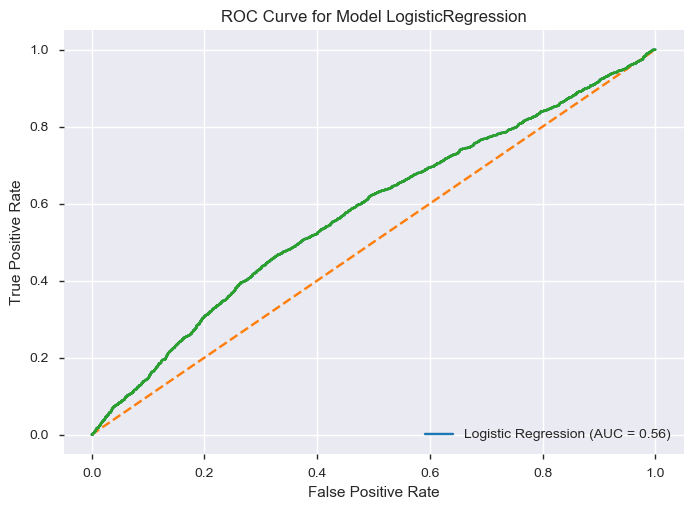

In [98]:
# roc curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# fit a model
model = LogisticRegression()
#model = GridSearchCV(
#    estimator = LogisticRegression(random_state=seed),
#    param_grid = {
#        'penalty': ['l1', 'l2'],
#        'C': [0.001, 0.01, 1, 10, 100, 1000]})#, 
    #cv = kfold, 
    #scoring = scoring, 
    #n_jobs = processors)
model.fit(X_train, y_train)
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure()
pyplot.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr)
# show the plot
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve for Model LogisticRegression')
pyplot.legend(loc="lower right")
pyplot.savefig('Log_ROC')
pyplot.show()

In [99]:
from sklearn.metrics import log_loss
# predict probabilities
probs = model.predict_proba(X_test)
# keep the predictions for class 1 only
probs = probs[:, 1]
# calculate log loss
loss = log_loss(y_test, probs)
print("Log Loss for Logistic Regression")
print(loss)

Log Loss for Logistic Regression
0.6802183890277625


In [100]:
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.58


## Confusion Matrix for Logistic Regression

In [101]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#[row, column]
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

[[2089  728]
 [1427  896]]


## 6. Metrics computed from a confusion matrix
## Classification Accuracy: Overall, how often is the classifier correct?

In [102]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.580739299610895


In [103]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.580739299610895
0.580739299610895


Classification Error: Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [104]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.41926070038910507
0.419260700389105


### Sensitivity: When the actual value is positive, how often is the prediction correct?

##Something we want to maximize
##How "sensitive" is the classifier to detecting positive instances?
##Also known as "True Positive Rate" or "Recall"
##TP / all positive
##all positive = TP + FN

In [105]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.3857081360309944
0.3857081360309944


## Specificity: When the actual value is negative, how often is the prediction correct?

#Something we want to maximize
#How "specific" (or "selective") is the classifier in predicting positive instances?
#TN / all negative
#all negative = TN + FP

In [106]:
specificity = TN / (TN + FP)
print(specificity)

0.741569045083422


In [107]:
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [108]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.2584309549165779
0.25843095491657797


In [109]:
##Precision: When a positive value is predicted, how often is the prediction correct?
##How "precise" is the classifier when predicting positive instances?

In [110]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred))

0.5517241379310345
0.5517241379310345


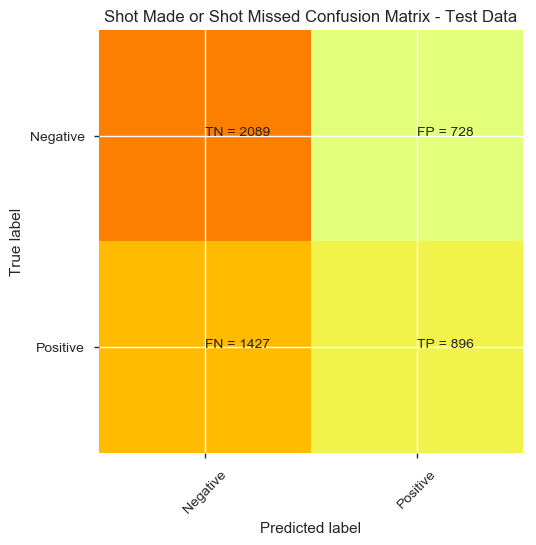

In [111]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Shot Made or Shot Missed Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Linear Discriminant Analysis (LDA) model

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#model = LDA(n_components=3)
model = LDA(n_components=1, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
X_lda = model.fit_transform(X, y)
kobe_df["PC1"] = X_lda[:,0]

lda_grid = GridSearchCV(
    estimator = LinearDiscriminantAnalysis(),
    param_grid = {
        'solver': ['lsqr'],
        'shrinkage': [0, 0.25, 0.5, 0.75, 1],
        'n_components': [None, 2, 5, 10]
    }, 
    cv = kfold, 
    #scoring = scoring, 
    n_jobs = processors)

lda_grid.fit(X, y)
lda_grid.predict_log_proba(X)

print(lda_grid.best_score_)
print(lda_grid.best_params_)
print(lda_grid.score)
#print(lda_grid.predict_log_proba)
#sns.regplot(data = kobe_df[["PC1","class"]], x = "PC1",y = "class", fit_reg=False,scatter_kws = {'s':50}, )

0.5904191150717982
{'n_components': None, 'shrinkage': 0, 'solver': 'lsqr'}
<bound method BaseSearchCV.score of GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'solver': ['lsqr'], 'shrinkage': [0, 0.25, 0.5, 0.75, 1], 'n_components': [None, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>


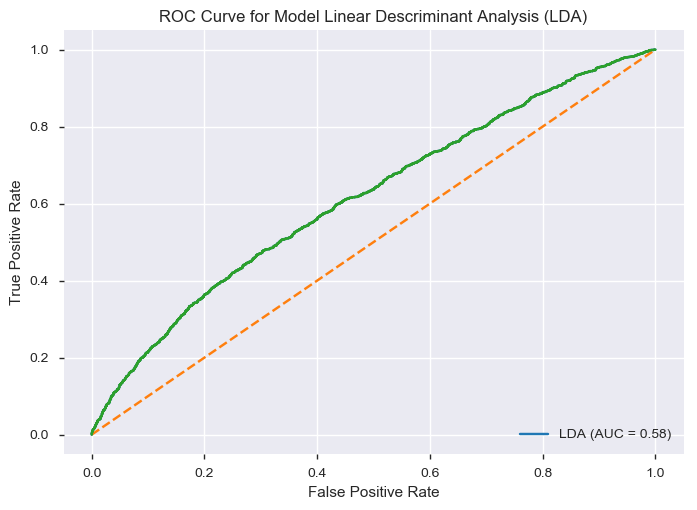

In [40]:
# roc curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
#logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
# fit a model
priors = np.array([.5538, .4461])
model = LDA(n_components=1, priors=priors, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
model.fit(X_train, y_train)
logit_lda_auc = roc_auc_score(y_test, model.predict(X_test))
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure()
pyplot.plot(fpr, tpr, label='LDA (AUC = %0.2f)' % logit_lda_auc)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr)
# show the plot
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve for Model Linear Descriminant Analysis (LDA)')
pyplot.legend(loc="lower right")
pyplot.savefig('Log_ROC')
pyplot.show()

In [335]:
from sklearn.metrics import log_loss
# predict probabilities
probs = model.predict_proba(X_test)
# keep the predictions for class 1 only
probs = probs[:, 1]
# calculate log loss
loss = log_loss(y_test, probs)
print("Log Loss for Linear Descriminant Analysis (LDA)")
print(loss)

Log Loss for Linear Descriminant Analysis (LDA)
0.6643351939239616


In [231]:
y_pred = model.predict(X_test)
print('Accuracy of LDA classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of LDA classifier on test set: 0.63


## Confusion Matrix for Linear Discriminant Analysis (LDA)

In [232]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#[row, column]
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

[[2321  584]
 [1333  902]]


## 6. Metrics computed from a confusion matrix
## Classification Accuracy: Overall, how often is the classifier correct?

In [233]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.6270428015564202


In [234]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.6270428015564202
0.6270428015564202


Classification Error: Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [456]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.37334630350194553
0.37334630350194553


### Sensitivity: When the actual value is positive, how often is the prediction correct?

##Something we want to maximize
##How "sensitive" is the classifier to detecting positive instances?
##Also known as "True Positive Rate" or "Recall"
##TP / all positive
##all positive = TP + FN

In [457]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.41554211261051655
0.41554211261051655


## Specificity: When the actual value is negative, how often is the prediction correct?

#Something we want to maximize
#How "specific" (or "selective") is the classifier in predicting positive instances?
#TN / all negative
#all negative = TN + FP

In [458]:
specificity = TN / (TN + FP)
print(specificity)

0.7783350050150452


In [459]:
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [460]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.22166499498495487
0.22166499498495484


In [461]:
##Precision: When a positive value is predicted, how often is the prediction correct?
##How "precise" is the classifier when predicting positive instances?

In [462]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred))

0.5739074550128535
0.5739074550128535


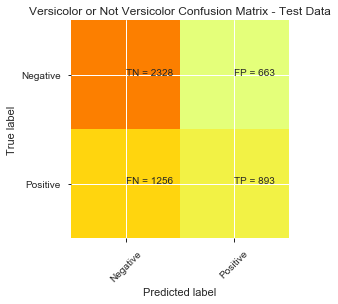

In [463]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [464]:
X.dtypes

attendance                   int64
shot_distance                int64
shot_zone_range_code         int64
game_event_id                int64
shot_zone_basic_code         int64
shot_type_code               int64
shot_zone_area_code          int64
action_type_code             int64
period_code                  int64
combined_shot_type_code      int64
home_play                    int64
avgnoisedb                 float64
dtype: object

# PCA Visualization¶

In [372]:
components = 8
pca = PCA(n_components=components).fit(X)

Show explained variance for each component

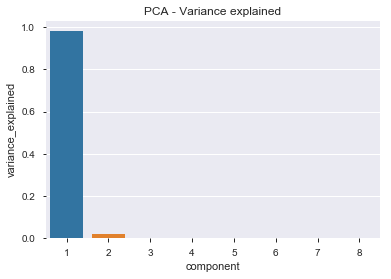

In [373]:
pca_variance_explained_df = pd.DataFrame({
    "component": np.arange(1, components+1),
    "variance_explained": pca.explained_variance_ratio_            
    })

ax = sns.barplot(x='component', y='variance_explained', data=pca_variance_explained_df)
ax.set_title("PCA - Variance explained")
plt.show()

# Make final predictions

In [351]:
#model.fit(X,y)
preds = model.predict_proba(X_test)

submission = pd.DataFrame()
#submission["shot_id"] = data_submit.index
submission["shot_id"] = X.shot_id
submission["shot_made_flag"]= preds[:,0]

submission.to_csv("sub.csv",index=False)

ValueError: Length of values does not match length of index